## Importing libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [185]:
df = pd.read_csv('train_ctrUa4K.csv')

In [186]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Info on the data

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [188]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


### Imputing Null values

In [189]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [190]:
gen = []
for i,j in zip(df.Gender,df.ApplicantIncome):
    if (i is np.nan) and (j>4643):
        gen.append('Male')
    elif (i is np.nan) and (j <= 4643):
        gen.append('Female')
    else:
        gen.append(i)

In [191]:
df['Gender'] = gen

In [192]:
# df.ApplicantIncome.groupby(df.Married).mean()

In [193]:
mar = []
for i,j in zip(df.Married,df.ApplicantIncome):
    if (i is np.nan) and (j>4970):
        mar.append('Yes')
    elif (i is np.nan) and (j <= 4970):
        mar.append('No')
    else:
        mar.append(i)

In [194]:
df['Married'] = mar

In [195]:
### Imputing dependants value as 1 if married, else with mode
dep = []
for i,j in zip(df.Dependents,df.Married):
    if (i is np.nan) and (j == 'Yes'):
        dep.append('1')
    else:
        dep.append(i)

In [196]:
df['Dependents'] = dep

In [197]:
df.Dependents.value_counts()

0     345
1     111
2     101
3+     51
Name: Dependents, dtype: int64

In [198]:
df['Dependents'].fillna('0',axis=0,inplace=True)

In [199]:
# df.ApplicantIncome.groupby(df.Self_Employed).mean()

In [200]:
se = []
for i,j in zip(df.Self_Employed,df.ApplicantIncome):
    if (i is np.nan) and (j > 5050):
        se.append('Yes')
    elif (i is np.nan) and (j <= 5050):
        se.append('No')
    else:
        se.append(i)

In [201]:
df['Self_Employed'] = se

In [202]:
# df.LoanAmount.median()

In [203]:
df['LoanAmount'].fillna(128,axis=0,inplace=True)

In [204]:
# df.Loan_Amount_Term.value_counts()

In [205]:
df['Loan_Amount_Term'].fillna(360,axis=0,inplace=True)

In [206]:
# df.Credit_History.value_counts()

In [207]:
df['Credit_History'].fillna(1,axis=0,inplace=True)

In [208]:
# df.isnull().sum()

## Data Analysis & Feature Engineering 

### Adding new feature "Total_family_income"

In [287]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_family_income,ApplicantIncome_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,Rich
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,MiddleClass
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Poor
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Poor
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Rich


In [219]:
df['Total_family_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

### Mean / median / max / min of the income 

In [241]:
def mxmn(feature):
    print('max    : ',df[feature].max())
    print('mean   : ',df[feature].mean())
    print('median : ',df[feature].median())
    print('min    : ',df[feature].min())

In [250]:
mxmn('CoapplicantIncome')

max    :  41667.0
mean   :  1621.2457980271008
median :  1188.5
min    :  0.0


In [251]:
mxmn('ApplicantIncome')

max    :  81000
mean   :  5403.459283387622
median :  3812.5
min    :  150


In [252]:
mxmn('Total_family_income')

max    :  81000.0
mean   :  7024.705081414722
median :  5416.5
min    :  1442.0


In [257]:
ai = []
for i in df['ApplicantIncome']:
    if i < 3812:
        ai.append('Poor')
    elif 3812<=i<5403:
        ai.append('MiddleClass')
    elif i >= 5403:
        ai.append('Rich')

In [258]:
df['ApplicantIncome_Category'] = ai

In [259]:
df['ApplicantIncome_Category'].value_counts()

Poor           306
Rich           176
MiddleClass    132
Name: ApplicantIncome_Category, dtype: int64

In [288]:
fi = []
for i in df['Total_family_income']:
    if i < 5416:
        fi.append('Poor')
    elif 5416<=i<7024:
        fi.append('MiddleClass')
    elif i >= 7024:
        fi.append('Rich')

In [289]:
df['Total_family_income_Category'] = fi

### Distributions and outliers

In [280]:
# plt.figure(figsize=(10,25))
# sns.boxplot(y = df.ApplicantIncome)
# plt.grid()
# plt.yticks(np.arange(0,90000,1000))
# plt.show()

In [457]:
appin_ls = pd.DataFrame(df.Loan_Status.groupby(df.ApplicantIncome_Category).value_counts(normalize=False))

In [456]:
# pr = appin_ls['Loan_Status']

In [459]:
appin_ls['Percentage'] = pr




                                      Loan_Status  Percentage
ApplicantIncome_Category Loan_Status                         
MiddleClass              Y                     91    0.689394
                         N                     41    0.310606
Poor                     Y                    210    0.686275
                         N                     96    0.313725
Rich                     Y                    121    0.687500
                         N                     55    0.312500


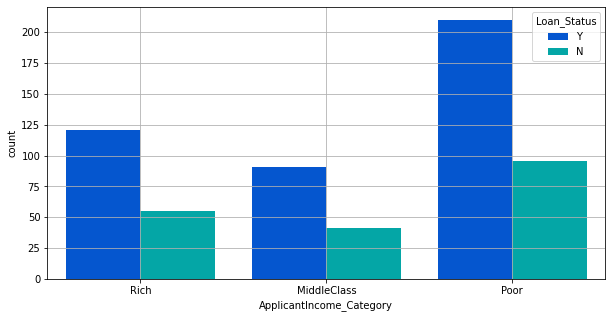

In [460]:
## Applicant Income category and loan status
plt.figure(figsize=(10,5))
sns.countplot(df.ApplicantIncome_Category,hue=df.Loan_Status,saturation=0.95,palette='winter')
print('\n\n')
print(appin_ls)
plt.grid()
plt.show()

In [467]:
famin_ls = pd.DataFrame(df.Loan_Status.groupby(df.Total_family_income_Category).value_counts(normalize=False))

In [469]:
# pr = famin_ls['Loan_Status']

In [471]:
famin_ls['Percentage'] = pr*100




                                          Loan_Status  Percentage
Total_family_income_Category Loan_Status                         
MiddleClass                  Y                     96   72.180451
                             N                     37   27.819549
Poor                         Y                    208   67.973856
                             N                     98   32.026144
Rich                         Y                    118   67.428571
                             N                     57   32.571429


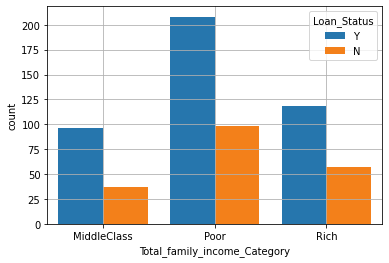

In [472]:
## Total family Income category and loan status
sns.countplot(df.Total_family_income_Category,hue=df.Loan_Status,saturation=0.9)
print('\n\n')
print(famin_ls)
plt.grid()
plt.show()

### Inference : we can infer that only 27% of the middle class customer's (Total family income between 5416 and 7024) loan is being rejected. On the other hand, 32% of both rich ( Total Income > 7024) and Poor (total income < 5416) customer's loan have been rejected.
###  Probability of a loan getting rejected for the rich and poor are higher than the Middle class! 

   ApplicantIncome Loan_Status
0      5446.078125           N
1      5384.068720           Y


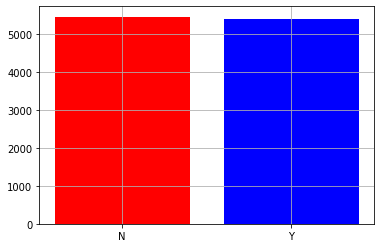

In [318]:
api_ls = pd.DataFrame(df.ApplicantIncome.groupby(df.Loan_Status).mean())
api_ls['Loan_Status'] = api_ls.index
api_ls.index = np.arange(0,len(api_ls))

plt.bar(api_ls.Loan_Status,api_ls.ApplicantIncome,color = ['r','b'])
plt.grid()
print(api_ls)
plt.show()

### Inference : Loan is not rejected based on the applicant's Income 

In [449]:
df.Total_family_income.groupby(df.Property_Area).mean()

Property_Area
Rural        7199.620782
Semiurban    6812.394850
Urban        7114.598020
Name: Total_family_income, dtype: float64

In [404]:
prop_status = pd.DataFrame(df.Loan_Status.groupby(df.Property_Area).value_counts(normalize=False))

In [408]:
# pr = prop_status['Loan_Status']

In [406]:
prop_status['Percentage'] = pr

In [407]:
prop_status

Loan_Status  Percentage
Property_Area Loan_Status                         
Rural         Y                    110    0.614525
              N                     69    0.385475
Semiurban     Y                    179    0.768240
              N                     54    0.231760
Urban         Y                    133    0.658416
              N                     69    0.341584

### Inference :  We can infer that only 23% of loans from semi urban customers are being rejected and 38% of rural customers are being rejected 

In [412]:
gen_ls = pd.DataFrame(df.Loan_Status.groupby(df.Gender).value_counts(normalize=False)).sort_index()

In [416]:
# pr = gen_ls['Loan_Status']

In [418]:
gen_ls['Percentage'] = pr*100




                    Loan_Status  Percentage
Gender Loan_Status                         
Female N                     42   35.294118
       Y                     77   64.705882
Male   N                    150   30.303030
       Y                    345   69.696970


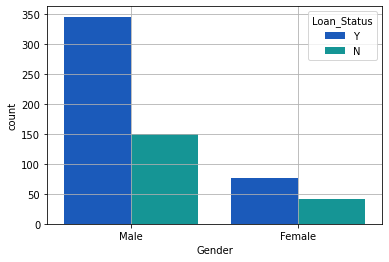

In [479]:
## count of loan status with hue gender
sns.countplot(df.Gender,palette='winter',hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(gen_ls)
# print(df.Loan_Status.value_counts(),'\n')
plt.show()

### Inference : we can infer that 35% of loans are being rejected for females and only 30% of loans are rejected for male

In [490]:
edu_ls = pd.DataFrame(df.Loan_Status.groupby(df.Education).value_counts(normalize=False))

In [489]:
pr = edu_ls['Loan_Status']

In [491]:
edu_ls['Percentage'] = pr*100




                          Loan_Status  Percentage
Education    Loan_Status                         
Graduate     Y                    340   70.833333
             N                    140   29.166667
Not Graduate Y                     82   61.194030
             N                     52   38.805970 



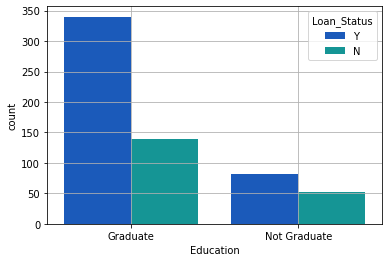

In [492]:
## count of loan status with hue Education
sns.countplot(df.Education,palette='winter',hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(edu_ls,'\n')
plt.show()

### Inference : almost 39% of loans for Non Graduates are being rejected but only 29% of the loans for Graduates are Rejected.

In [499]:
self_ls = pd.DataFrame(df.Loan_Status.groupby(df.Self_Employed).value_counts(normalize=False))

In [498]:
pr = self_ls['Loan_Status']

In [500]:
self_ls['Percentage'] = pr*100

In [501]:
self_ls

Loan_Status  Percentage
Self_Employed Loan_Status                         
No            Y                    361   68.893130
              N                    163   31.106870
Yes           Y                     61   67.777778
              N                     29   32.222222




                           Loan_Status  Percentage
Self_Employed Loan_Status                         
No            Y                    361   68.893130
              N                    163   31.106870
Yes           Y                     61   67.777778
              N                     29   32.222222 



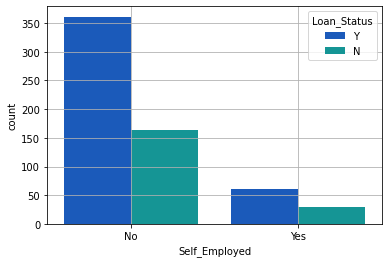

In [502]:
## count of loan status with hue Self_Employed
sns.countplot(df.Self_Employed,palette='winter',hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(self_ls,'\n')
plt.show()

In [ ]:
## count of loan status with hue dependents
sns.countplot(df.Loan_Status,palette='winter',hue=df.Dependents)
plt.grid()
print('\n')
print(df.Loan_Status.value_counts(),'\n')
plt.show()

Male      489
Female    112
Name: Gender, dtype: int64


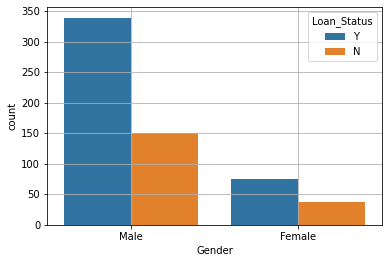

In [8]:
sns.countplot(df.Gender,hue=df.Loan_Status)
plt.grid()
print(df.Gender.value_counts())
plt.show()

No     500
Yes     82
Name: Self_Employed, dtype: int64


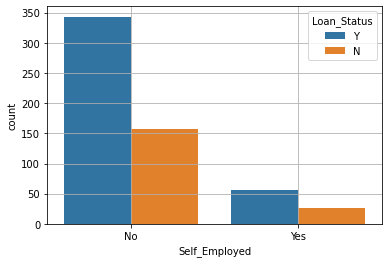

In [9]:
sns.countplot(df.Self_Employed,hue=df.Loan_Status)
plt.grid()
print(df.Self_Employed.value_counts())
plt.show()

In [12]:
round(df.LoanAmount.mean(),2)

146.41

In [13]:
round(df.Loan_Amount_Term.mean(),2)

342.0

In [14]:
round(df.CoapplicantIncome.mean(),2)

1621.25

In [15]:
round(df.ApplicantIncome.mean(),2)

5403.46

In [17]:
df.ApplicantIncome.groupby(df.Gender).mean()

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

In [18]:
df.LoanAmount.groupby(df.Gender).mean()

Gender
Female    126.697248
Male      149.265957
Name: LoanAmount, dtype: float64

In [21]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

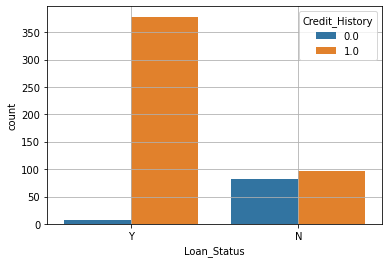

In [20]:
sns.countplot(df.Loan_Status,hue=df.Credit_History)
plt.grid()
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


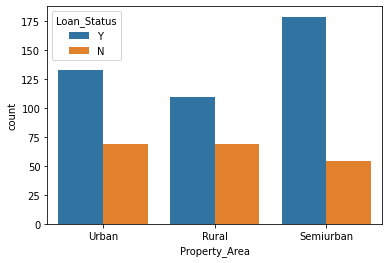

In [52]:
sns.countplot(df.Property_Area,hue=df.Loan_Status)
print(df.Property_Area.value_counts())
plt.show()

In [54]:
df.LoanAmount.groupby(df.Loan_Amount_Term).mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

<AxesSubplot:>

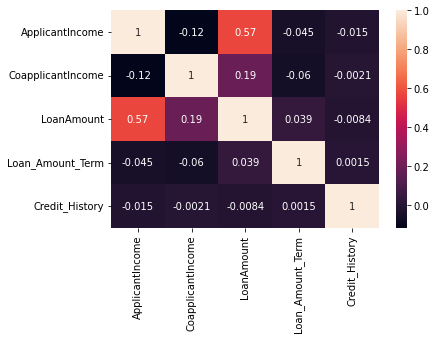

In [55]:
sns.heatmap(df.corr(),annot=True)

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
ml = df.copy()

In [35]:
ml.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,1,0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
ml.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [27]:
gen = []
for i in ml.Gender:
    if i == 'Male':
        gen.append(1)
    else:
        gen.append(0)
ml['Gender'] = gen

In [29]:
mar = []
for i in ml.Married:
    if i == 'Yes':
        mar.append(1)
    else:
        mar.append(0)
ml['Married'] = mar

In [32]:
edu = []
for i in ml.Education:
    if i == 'Graduate':
        edu.append(1)
    else:
        edu.append(0)
ml['Education'] = edu

In [34]:
se = []
for i in ml.Self_Employed:
    if i == 'Graduate':
        se.append(1)
    else:
        se.append(0)
ml['Self_Employed'] = se

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier